# 预备知识：数据源

在进入案例之前，简单说一下数据源。证券市场研究常用的数据源有：

## 常用数据源
### CSMAR国泰安数据库

CSMAR包括大量宏微观数据和上市公司数据（主要是**历史数据**，区别于**实时数据**），
常用于科研。这也是本课程主要的数据来源。

主页在https://data.csmar.com/，网站会自动识别你的IP地址，校园网内可直接使用。

学校未必会购买整个CSMAR数据库，如果遇到部分数据学校没有购买的情况，
可以考虑淘宝购买账号，价格低廉，还可以多人共用。

### Wind万得和iFinD同花顺客户端的API

价格昂贵的数据终端，我们学校应该没买，土豪和金融机构的选择。

### 某些Python包

1. Tushare。主页在https://tushare.pro/
2. AKShare。主页在https://www.akshare.xyz/

这2个包最初都是现成写好的爬虫，背后是抓取如新浪财经或者东方财富网等网站的数据。如果你需要**实时数据**，或者**少量历史数据**又不想去CSMAR搜索下载，可以考虑。

本课某些场合可能会用到AKShare，不用注册，比较省事。


### 自己写爬虫

如果有些数据，上述几个来源的都无法满足，又正好有网站提供（比如上交所和深交所的主页有大量的数据），那么可以自己写爬虫爬取。网站各个不同，因此写爬虫是“一事一议”的工作，考虑作为选学内容。


## CSMAR获取数据范例

从CSMAR中搜索并下载数据，和用百度搜索，或者和从网店购物差不多。唯独需要注意的是，CSMAR中下载的数据可能有多重header。

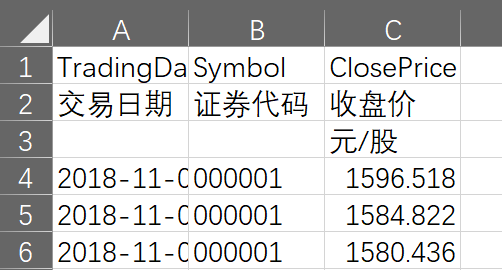

在这个示例中，Excel表的开头3行都是标题，第4行才是数据。

### 多重标题数据的处理

处理这种数据，可以：

1. 手工删除不需要的行，只保留需要的行，保存即可。
   
或者：

2. 用`pd.read_excel()`读取的时候进行处理，也有2种方案：
    - 用参数`header`指定哪几行是标题，形成多重列标签。因为这里的多重header很难指定converters，所以CSMAR数据不推荐。
    - 用参数`skiprows`忽略某些行。（* **推荐**）

### 形成多重header

In [11]:
%%capture --no-display 
# 这一行用于忽略本cell的warning

import pandas as pd

# 读取数据，前3行是标题
df = pd.read_excel('data/TRD_BwardQuotation.xlsx',header=[0,1,2])
df.head()


,TradingDate,Symbol,ClosePrice
,交易日期,证券代码,收盘价
,Unnamed: 0_level_2,Unnamed: 1_level_2,元/股
0,2018-11-05,1,1596.518
1,2018-11-06,1,1584.822
2,2018-11-07,1,1580.436
3,2018-11-08,1,1592.132
4,2018-11-09,1,1542.423


### 跳过某些的行

从Excel文件本身，或者上一节的结果都可知，我们应该去掉的是0、2行，保留1行中文标签。

In [13]:
%%capture --no-display

df = pd.read_excel('data/TRD_BwardQuotation.xlsx', skiprows=[0, 2],
                   converters={'证券代码': str, '交易日期': pd.to_datetime})
df.head()

,交易日期,证券代码,收盘价
0,2018-11-05,000001,1596.518
1,2018-11-06,000001,1584.822
2,2018-11-07,000001,1580.436
3,2018-11-08,000001,1592.132
4,2018-11-09,000001,1542.423
